# **DS Project For Employee Salaries**

### **Load Necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** Read Salaries.csv as a dataframe called sal.**

In [ ]:
# for jupyter
#sal = pd.read_csv('Salaries.csv')

# for colab
sal = pd.read_csv('Salaries.csv')

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
# change JobTitle data type to category
sal.JobTitle = sal.JobTitle.astype('category')

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  int64   
 1   EmployeeName      148654 non-null  object  
 2   JobTitle          148654 non-null  category
 3   BasePay           148045 non-null  float64 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  int64   
 10  Notes             0 non-null       float64 
 11  Agency            148654 non-null  object  
 12  Status            0 non-null       float64 
dtypes: category(1), float64(8), int64(2), object(2)
memory usage: 14.0+ MB


In [ ]:
sal.JobTitle

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
...,...
148649,Custodian
148650,Not provided
148651,Not provided
148652,Not provided


In [ ]:
# reduce bit size
sal.BasePay = sal.BasePay.astype('float32')

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  int64   
 1   EmployeeName      148654 non-null  object  
 2   JobTitle          148654 non-null  category
 3   BasePay           148045 non-null  float32 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  int64   
 10  Notes             0 non-null       float64 
 11  Agency            148654 non-null  object  
 12  Status            0 non-null       float64 
dtypes: category(1), float32(1), float64(7), int64(2), object(2)
memory usage: 13.4+ MB


# ** Check the head of the DataFrame. **

In [ ]:
sal.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.187500,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.015625,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.125000,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [ ]:
#sal.head(3)

#sal.isna().sum()
sal[50000:]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
50000,50001,Ronald Mitchell,Transit Operator,60127.531250,22858.37,981.18,35218.62,83967.08,119185.70,2012,NaN,San Francisco,NaN
50001,50002,Christopher Miller,Automotive Machinist,74883.921875,9554.27,1378.04,33367.46,85816.23,119183.69,2012,NaN,San Francisco,NaN
50002,50003,Michael Brown,IS Administrator 2,80171.000000,0.00,3948.94,35058.59,84119.94,119178.53,2012,NaN,San Francisco,NaN
50003,50004,Gina Gendotti,Administrative Analyst,81541.281250,0.00,2172.16,35464.47,83713.44,119177.91,2012,NaN,San Francisco,NaN
50004,50005,William Taylor,Transit Operator,63675.800781,16830.09,1473.21,37191.88,81979.10,119170.98,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.000000,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [ ]:
# Check nan values
sal.isna().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [ ]:
#total records , rows and columns
print('Total number of rows:',sal.shape[0])
print('Total number of columns:',sal.shape[1])

Total number of rows: 148654
Total number of columns: 13


In [ ]:
#check feature names
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
#drop Notes ,'Agency' and Status columns bcz they have 100% missing values
sal.drop(columns=['Id','Notes','Status','Agency'],inplace=True)

In [ ]:
#check new shape
print('Total number of columns after deletiion :',sal.shape[1])

Total number of columns after deletiion : 9


In [ ]:
#check columns
sal.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [ ]:
# keep one copy of dataframe to rollback
sal_copy = sal.copy()

In [ ]:
sal.isna().sum()

,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [ ]:
sal.BasePay

,BasePay
0,167411.187500
1,155966.015625
2,212739.125000
3,77916.000000
4,134401.593750
...,...
148649,0.000000
148650,NaN
148651,NaN
148652,NaN


In [ ]:
#fill BasePay NaN by using some technique
#sal.BasePay.isna().sum()
sal.BasePay.describe()

,BasePay
count,148045.000000
mean,66325.445312
std,42763.625000
min,-166.009995
25%,33588.199219
50%,65007.449219
75%,94691.046875
max,319275.000000


In [ ]:
# how many employees getting -ve basepay
sal.query('BasePay<=0').shape[0]

1309

In [ ]:
# fetch index of above employee
sal.query('BasePay<=0').index

Index([  2896,   3263,  19058,  20834,  21658,  23694,  24420,  26006,  26472,
        26565,
       ...
       148640, 148641, 148642, 148643, 148644, 148645, 148647, 148648, 148649,
       148653],
      dtype='int64', length=1309)

In [ ]:
sal.drop(index=sal.query('BasePay<=0').index,inplace=True)

In [ ]:
sal.query('BasePay<=0').shape[0]

0

0

In [ ]:
# fill missing values in BasePay using mean
# mean      66917.13
# calculate mean of BasePay
sal.BasePay.mean()

66917.13

In [ ]:
sal.BasePay.fillna(66917,inplace=True)

<ipython-input-28-946d42cdf05d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sal.BasePay.fillna(66917,inplace=True)


In [ ]:
sal.BasePay

,BasePay
0,167411.187500
1,155966.015625
2,212739.125000
3,77916.000000
4,134401.593750
...,...
148620,15.500000
148646,66917.000000
148650,66917.000000
148651,66917.000000


In [ ]:
# Assignmnet: Round the basePay
sal.BasePay = round(sal.BasePay)
sal.BasePay

,BasePay
0,167411.0
1,155966.0
2,212739.0
3,77916.0
4,134402.0
...,...
148620,16.0
148646,66917.0
148650,66917.0
148651,66917.0


<Axes: >

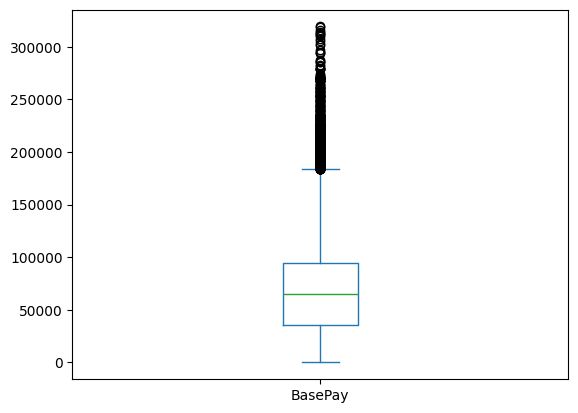

In [ ]:
sal.BasePay.plot(kind='box')

In [ ]:
# fill NaN value in BasePay
sal.BasePay = sal.BasePay.fillna(66319.52)

In [ ]:
sal.BasePay.isna().sum()

In [ ]:
#check BasePay of Transit Operator
#sal[sal.JobTitle == 'Transit Operator']
#sal.groupby('JobTitle').get_group('Transit Operator')
sal.query('JobTitle == "Transit Operator"')

In [ ]:
#check duplicate rows
sal[sal.duplicated()]

we dont have duplicate records

In [ ]:
sal.isna().any()

,0
EmployeeName,False
JobTitle,False
BasePay,False
OvertimePay,True
OtherPay,True
Benefits,True
TotalPay,False
TotalPayBenefits,False
Year,False


# ** find out how many entries are there **

In [ ]:
#number of rows
sal.shape[0]

147345

In [ ]:
len(sal)

147345

In [ ]:
# No. records present in 2014
len(sal.query('Year==2014'))

#sal.query('Year==2014').shape[0]

37697

<Axes: >

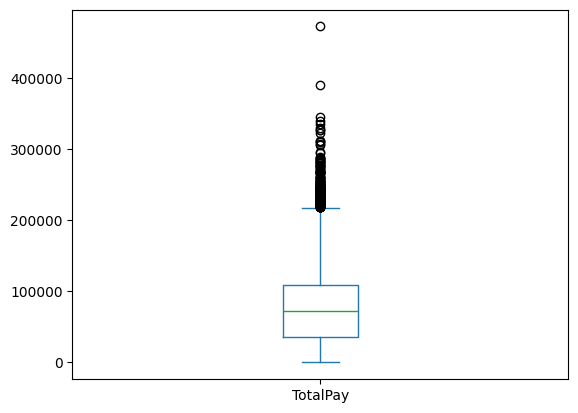

In [ ]:
#lets check integrity of data
sal.query('Year==2014')['TotalPay'].plot(kind='box')

<Axes: ylabel='Frequency'>

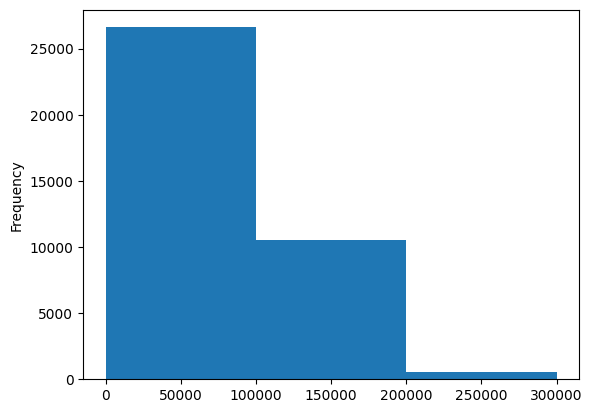

In [ ]:
sal.query('Year==2014')['TotalPay'].plot(kind='hist',bins=[0,100000,200000,300000])

In [ ]:
sal.query('Year==2014')['TotalPay'].nsmallest()

,TotalPay
148646,0.0
148650,0.0
148651,0.0
148652,0.0
148620,15.5


In [ ]:
# How many employee getting 0> total Pay
sum(sal.TotalPay <= 0)

292

In [ ]:
# display records of employee getting TotalPay <=0
sal.query('TotalPay<=0')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
106545,Eugene G Duffy,Sewer Service Worker,66917.0,0.0,0.0,8308.87,0.0,8308.87,2013
106551,Randy J Keys,Carpenter,66917.0,0.0,0.0,8301.45,0.0,8301.45,2013
106561,Dominic C Marquez,Sign Worker,66917.0,0.0,0.0,8284.98,0.0,8284.98,2013
106576,Lennard B Hutchinson,Electrician,66917.0,0.0,0.0,8253.87,0.0,8253.87,2013
106583,Paulet Gaines,Account Clerk,66917.0,0.0,0.0,8227.22,0.0,8227.22,2013
...,...,...,...,...,...,...,...,...,...
110530,David P Kucia,Police Officer 3,66917.0,0.0,0.0,-33.89,0.0,-33.89,2013
148646,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.00,2014
148650,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.00,2014
148651,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.00,2014


In [ ]:
# how many are there whose post is Not provided
sal.query('JobTitle=="Not provided"')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.0,2014
148650,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.0,2014
148651,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.0,2014
148652,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.0,2014


# **What is the average BasePay ?**

In [ ]:
sal['BasePay'].mean()

66917.14

# ** What is the highest amount of OvertimePay in the dataset ? **

In [ ]:
sal.OvertimePay.max()

245131.88

## Fetch record of Highest paid employee

In [ ]:
#sal.query('TotalPayBenefits==TotalPayBenefits.max()')
sal[sal.TotalPayBenefits == sal.TotalPayBenefits.max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.0,0.0,400184.25,NaN,567595.43,567595.43,2011


In [ ]:
#Fetch name of highest Overtime pay employee
#sal.query('OvertimePay==OvertimePay.max()')['EmployeeName']
sal.query('OvertimePay==OvertimePay.max()').EmployeeName

,EmployeeName
1,GARY JIMENEZ


# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [ ]:
sal.query('EmployeeName=="JOSEPH DRISCOLL"')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
24,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140547.0,97868.77,31909.28,NaN,270324.91,270324.91,2011


In [ ]:
#fetch both Joseph records lower and upper case
sal[sal['EmployeeName'].str.contains('joseph driscoll',case=False)]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
24,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140547.0,97868.77,31909.28,NaN,270324.91,270324.91,2011
36198,Joseph Driscoll,"Captain, Fire Suppression",145659.0,114513.29,28743.36,42919.16,288915.63,331834.79,2012


In [ ]:
# Yearwise average TotalPay
#sal.query('Year==2014')['TotalPay'].mean()
sal.groupby('Year')['TotalPay'].mean()

,TotalPay
Year,
2011,72595.460609
2012,74928.282957
2013,77611.443142
2014,76271.634808


# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [ ]:
sal.query('EmployeeName=="JOSEPH DRISCOLL"').TotalPayBenefits

,TotalPayBenefits
24,270324.91


In [ ]:
# I want mean, sum, std of TotalPay	TotalPayBenefits
sal[['TotalPay','TotalPayBenefits']].agg([np.mean,np.sum,np.std])

<ipython-input-53-a8c2187c102c>:2: FutureWarning: The provided callable <function mean at 0x7b047dbfd5a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sal[['TotalPay','TotalPayBenefits']].agg([np.mean,np.sum,np.std])
<ipython-input-53-a8c2187c102c>:2: FutureWarning: The provided callable <function sum at 0x7b047dbfc670> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sal[['TotalPay','TotalPayBenefits']].agg([np.mean,np.sum,np.std])
<ipython-input-53-a8c2187c102c>:2: FutureWarning: The provided callable <function std at 0x7b047dbfd6c0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  sal[['TotalPay','TotalPayBenefits']].agg([np.mean,np.su

,TotalPay,TotalPayBenefits
mean,7.539145e+04,9.447678e+04
sum,1.110855e+10,1.392068e+10
std,5.028832e+04,6.250217e+04


In [ ]:
# Create a new feature Bonus : condition is=Add 20% of BasePay into TotalPay
sal ['Bonus'] = sal.BasePay*.2 + sal.TotalPay

In [ ]:
sal.Bonus

,Bonus
0,601077.629219
1,570102.481172
2,377827.710781
3,347926.810195
4,353253.590391
...,...
148620,18.700000
148646,13383.400391
148650,13383.400391
148651,13383.400391


In [ ]:
# Fetch CAPTAIN III (POLICE DEPARTMENT) whose TotalPay is> 400000
sal.query('JobTitle=="CAPTAIN III (POLICE DEPARTMENT)" & TotalPay>400000')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Bonus
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.0,245131.88,137811.38,NaN,538909.28,538909.28,2011,570102.481172


In [ ]:
# yearwise sum of BasePay and average basePay
sal.groupby('Year')['BasePay'].agg([np.sum,np.mean])

<ipython-input-57-a95219e76bfb>:2: FutureWarning: The provided callable <function sum at 0x7b047dbfc670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sal.groupby('Year')['BasePay'].agg([np.sum,np.mean])
<ipython-input-57-a95219e76bfb>:2: FutureWarning: The provided callable <function mean at 0x7b047dbfd5a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sal.groupby('Year')['BasePay'].agg([np.sum,np.mean])


,sum,mean
Year,,
2011,2.299566e+09,64400.988281
2012,2.405836e+09,66212.640625
2013,2.616866e+09,69586.406250
2014,2.537637e+09,67316.679688


# ** What is the name, Job title of highest paid person (including benefits)?**

In [ ]:
sal[sal.TotalPayBenefits == sal.TotalPayBenefits.max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Bonus
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.0,0.0,400184.25,NaN,567595.43,567595.43,2011,601077.629219


# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [ ]:
sal[sal.TotalPay == sal.TotalPay.min()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Bonus
106545,Eugene G Duffy,Sewer Service Worker,66917.0,0.0,0.0,8308.87,0.0,8308.87,2013,13383.400391
106551,Randy J Keys,Carpenter,66917.0,0.0,0.0,8301.45,0.0,8301.45,2013,13383.400391
106561,Dominic C Marquez,Sign Worker,66917.0,0.0,0.0,8284.98,0.0,8284.98,2013,13383.400391
106576,Lennard B Hutchinson,Electrician,66917.0,0.0,0.0,8253.87,0.0,8253.87,2013,13383.400391
106583,Paulet Gaines,Account Clerk,66917.0,0.0,0.0,8227.22,0.0,8227.22,2013,13383.400391
...,...,...,...,...,...,...,...,...,...,...
110530,David P Kucia,Police Officer 3,66917.0,0.0,0.0,-33.89,0.0,-33.89,2013,13383.400391
148646,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.00,2014,13383.400391
148650,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.00,2014,13383.400391
148651,Not provided,Not provided,66917.0,NaN,NaN,NaN,0.0,0.00,2014,13383.400391


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [ ]:
# Yearwise Average BasePay
sal.groupby('Year')['BasePay'].mean()

,BasePay
Year,
2011,64400.988281
2012,66212.640625
2013,69586.406250
2014,67316.679688


# ** How many unique job titles are there? **

In [ ]:
# How many unique jobtitle are ther
sal.JobTitle.unique()

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 'CAPTAIN III (POLICE DEPARTMENT)', 'WIRE ROPE CABLE MAINTENANCE MECHANIC', 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)', 'ASSISTANT DEPUTY CHIEF II', ..., 'Apprentice Cement Mason I', 'Marina Associate Manager', 'Sr Cnselor, Juv Hall (SFERS)', 'Forensic Toxicologist Supervis', 'Not provided']
Length: 2153
Categories (2159, object): ['ACCOUNT CLERK', 'ACCOUNTANT', 'ACCOUNTANT INTERN',
                            'ACPO,JuvP, Juv Prob (SFERS)', ..., 'X-Ray Laboratory Aide',
                            'YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS', 'Youth Comm Advisor', 'ZOO CURATOR']

In [ ]:
sal.JobTitle.nunique()

2153

# ** What are the top 5 most common jobs? **

In [ ]:
sal.JobTitle.value_counts().head(5)

,count
JobTitle,
Transit Operator,6975
Special Nurse,4355
Registered Nurse,3701
Public Svc Aide-Public Works,2514
Custodian,2401


# How many are there those work as a POLICE OFFICER III

In [ ]:
sal.query('JobTitle=="POLICE OFFICER III"').shape[0]

776

# In which department we have least employees?

In [ ]:
sal.head(2)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Bonus
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.0,0.00,400184.25,NaN,567595.43,567595.43,2011,601077.629219
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.0,245131.88,137811.38,NaN,538909.28,538909.28,2011,570102.481172


In [ ]:
sal.JobTitle.value_counts().tail(1)

,count
JobTitle,
WAREHOUSE WORKER,0


# Fetch record of year 2011 where Basepay 200000

In [ ]:
sal.query('Year==2011 & BasePay==200000')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Bonus


# How much average basepay is given to employees inthe year 2013

In [ ]:
# How much average basepay is given to employees inthe year 2013
sal.query('Year==2013')['BasePay'].mean()

69586.41

# Plot.the % distribustion of Yearwise TotalPay

<Axes: ylabel='proportion'>

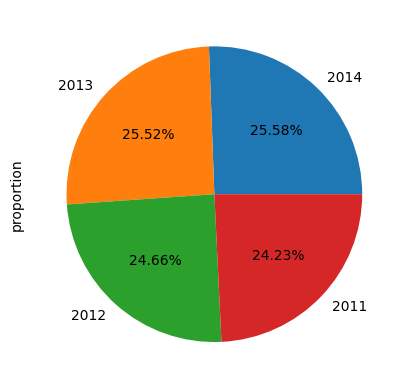

In [ ]:
# Plot.the % distribustion of Yearwise TotalPay
sal.Year.value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
# plt.pie(sal.Year,sal.TotalPay)

# How many employees getting 0 overtimePay?

In [ ]:
sal.query('OvertimePay==0').shape[0]

76096